## Logistic Regression

Logistic regression is a popular statistical method used for binary classification tasks. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that an instance belongs to a particular class. It's a linear model that applies a logistic (or sigmoid) function to the linear combination of input features, resulting in a value between 0 and 1 representing the probability.

### Perceptron Trick (Step Function)

The Perceptron trick is a technique used in logistic regression (and other linear classification algorithms) to update the weights iteratively during training. It's based on the concept of gradient descent and is used to minimize the cost function.

The Perceptron trick updates the weights $ \mathbf{w} $ iteratively based on the error between the predicted and true labels. It's similar to the update rule used in the Perceptron algorithm for binary classification.

1. **Prediction:** Compute the predicted probability $ \hat{y} $ using the current weights: $ \hat{y} = step(\mathbf{w}^T \mathbf{x}) $.\
    $ \mathbf{w}^T \mathbf{x} = \mathbf{w_0x_0} + \mathbf{w_1x_1} + \mathbf{w_3x_3} ... = 0 $ &nbsp; OR &nbsp; $ \mathbf{w}^T \mathbf{x} = \sum_{i}^{n}\mathbf{w_i x_i} $\
     where, $ \mathbf{w_0} = intercept $, $ \mathbf{x_0} = 1 $, and $ n = $ total number of columns.\
   if $ \mathbf{w}^T \mathbf{x} \geq 0 \Rightarrow \hat{y} = 1$\
   else $ \hat{y} = 0 $ 
3. **Error Calculation:** Calculate the error between the predicted and true labels: $ \text{error} = y - \hat{y} $.
    - $ y $ is the true label (0 or 1).
    - $ \hat{y} $ is the predicted label (0 or 1).
4. **Weight Update:** Update the weights using the Perceptron trick:

   $ \mathbf{w} := \mathbf{w} + \eta \cdot \text{error} \cdot \mathbf{x} $

   Where:
   - $ \eta $ is the learning rate, controlling the step size of the weight updates.
   - $ \mathbf{x} $ is the input features vector.

5. **Repeat:** Iterate through the dataset multiple times (epochs), updating the weights after each data point or mini-batch.

### Interpretation:

- The Perceptron trick aims to adjust the weights in the direction that reduces the error between the predicted and true labels.
- If the prediction is correct (error = 0), the weights remain unchanged.
- If the prediction is incorrect (error ≠ 0), the weights are adjusted to improve the prediction for the current data point.

### One Major Drawback
Unlike in the Perceptron algorithm, the Perceptron trick does not guarantee convergence to the optimal solution for logistic regression. This is because logistic regression aims to minimize the logistic loss function, which is non-convex. The Perceptron trick, which is based on a simple update rule, may not find the global minimum of the loss function and could get stuck in local minima or plateaus.

### Summary:

The Perceptron trick is a simple yet effective technique for updating the weights in logistic regression based on the error between the predicted and true labels. It iteratively adjusts the weights to minimize the logistic loss function, ultimately improving the model's predictive performance.

In [1]:
%matplotlib widget

In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
import matplotlib.pyplot as plt

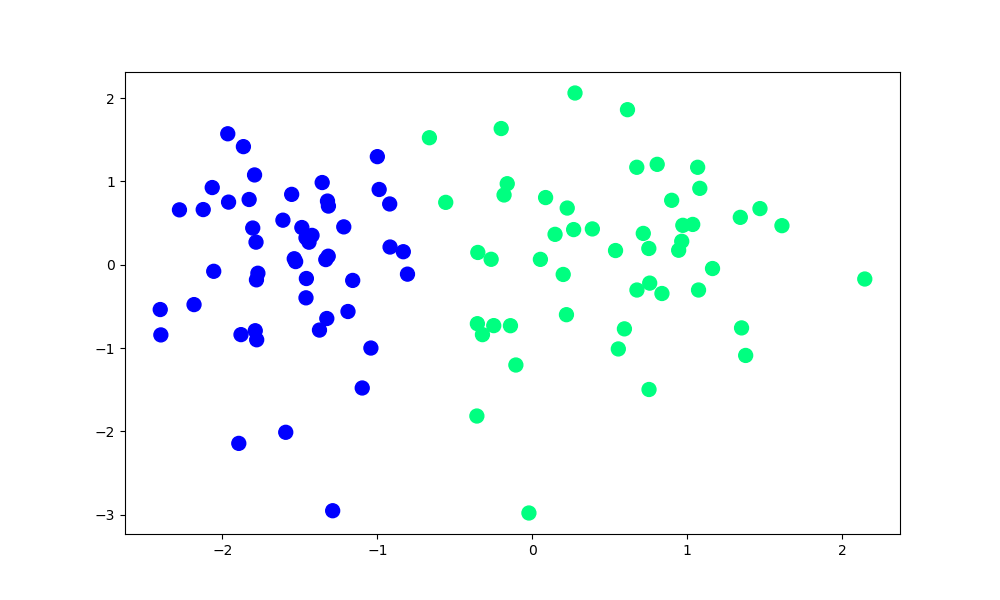

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [7]:
intercept_,coef_ = perceptron(X,y)

In [8]:
print(coef_)
print(intercept_)

[1.24797361 0.14552017]
1.0


In [9]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

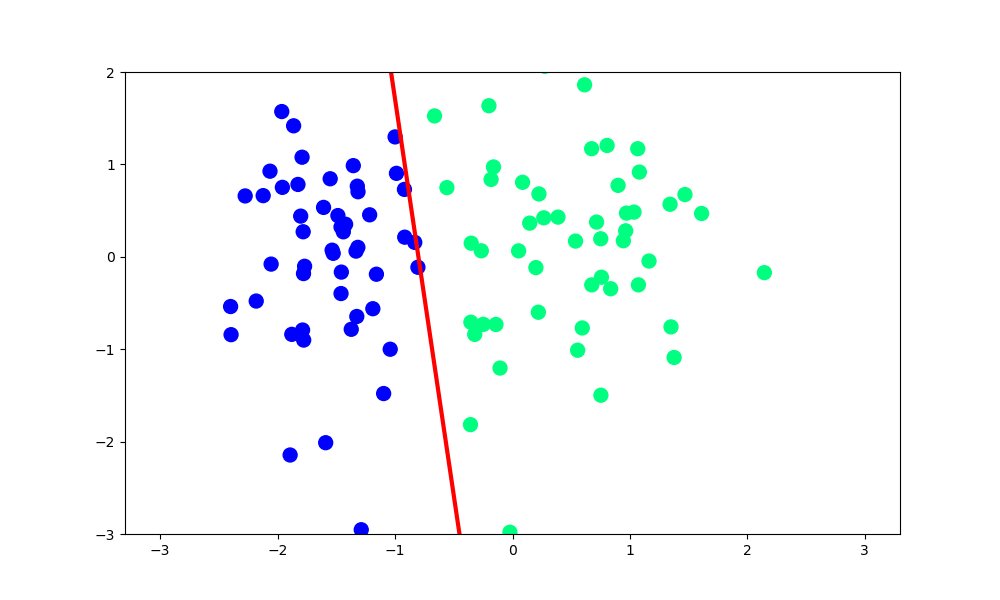

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [12]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [13]:
m,b = perceptron(X,y)

In [14]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

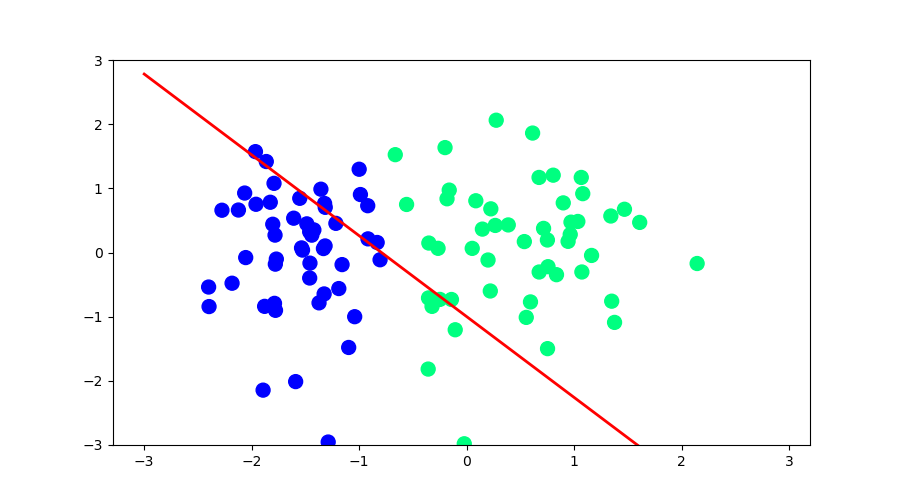

In [15]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=False, frames=200, interval=100)

In [16]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [17]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [18]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

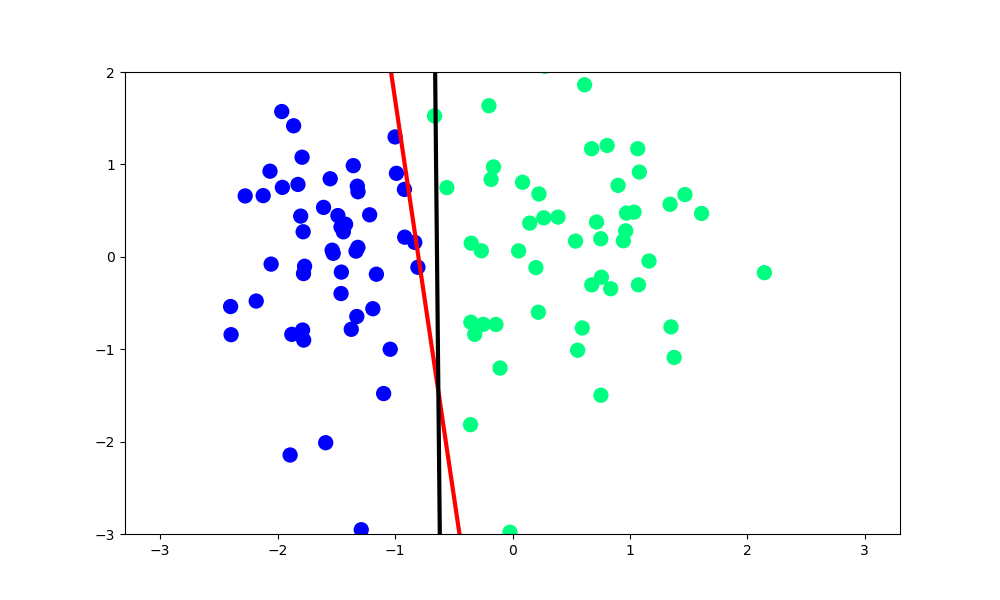

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)